<a href="https://colab.research.google.com/github/ThRahmani/TA-Probability1-Distributions-Notebook/blob/main/probability1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from math import e, pi, exp, factorial, sqrt, log
from scipy.special import gamma, beta, comb

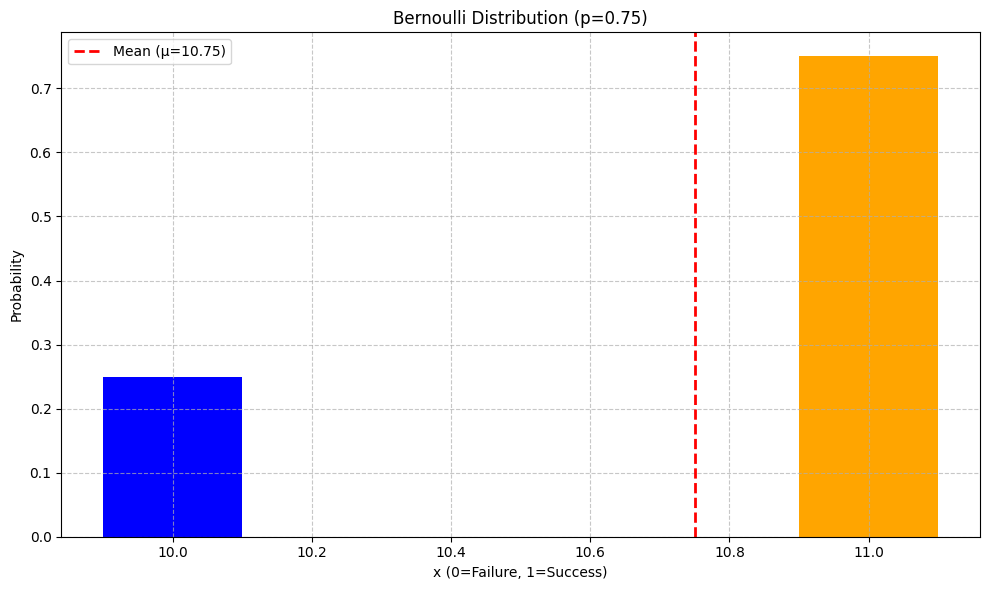

In [ ]:
 class Bernoli:
    def __init__(self, teta, p: [0,1]):
        self.p = p
        self.teta = teta

    def pmf(self, x:{0, 1}):
        return self.p**x*(1-self.p)**(1-x)

    def mean(self):
        return self.p+self.teta

    def variance(self):
        return self.p*(1-self.p)

    def graph(self):
        x_values = [0+self.teta, 1+self.teta]
        probabilities = [self.pmf(0), self.pmf(1)]

        plt.figure(figsize=(10, 6))
        plt.bar(x_values, probabilities, color=['blue', 'orange'], width=0.2)
        plt.title(f'Bernoulli Distribution (p={self.p})')
        plt.xlabel('x (0=Failure, 1=Success)')
        plt.ylabel('Probability')


        # نمایش میانگین (خط عمودی)
        mean = self.mean()
        plt.axvline(x=mean, color='red', linestyle='--', linewidth=2, label=f'Mean (μ={mean:.2f})')


        plt.grid(axis='x', linestyle='--', alpha=0.7)
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.legend()


X1 = Bernoli(10, 0.75)
X1.graph()


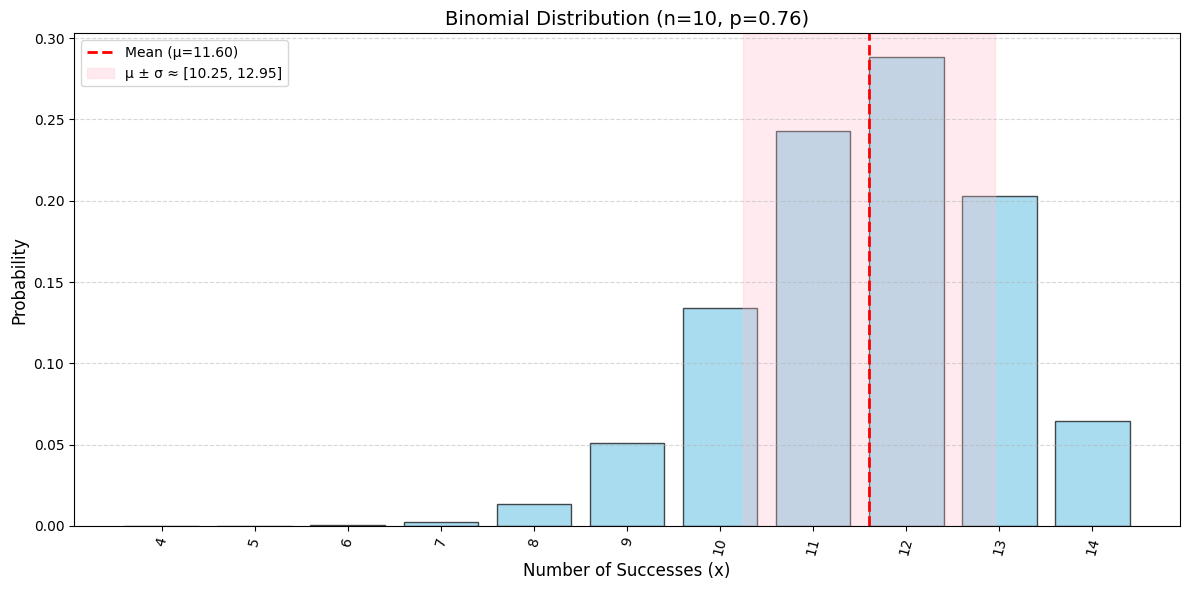

In [ ]:
class Binomial:
    def __init__(self, teta, n: int, p: [0,1]):
        self.n = n
        self.p = p
        self.teta = teta

    def pmf(self, x: int):
        return comb(self.n, x) * self.p**x * (1 - self.p)**(self.n - x)

    def mean(self):
        return self.n * self.p + self.teta

    def variance(self):
        return self.n * self.p * (1 - self.p)

    def graph(self):
        x_values = np.arange(0 + self.teta, self.n + 1 + self.teta)
        probabilities = [self.pmf(x - self.teta) for x in x_values]
        mean = self.mean()
        var = self.variance()
        std = var**0.5

        plt.figure(figsize=(12, 6))
        plt.bar(x_values, probabilities, color='skyblue', alpha=0.7, edgecolor='black')
        plt.title(f'Binomial Distribution (n={self.n}, p={self.p})', fontsize=14)
        plt.xlabel('Number of Successes (x)', fontsize=12)
        plt.ylabel('Probability', fontsize=12)

        # تنظیمات محور x:
        plt.xticks(
            ticks=x_values,
            rotation=75,
            fontsize=10
        )

        # نمایش میانگین و بازه μ ± σ
        plt.axvline(x=mean, color='red', linestyle='--', linewidth=2, label=f'Mean (μ={mean:.2f})')
        lower = mean - std
        upper = mean + std
        plt.axvspan(lower, upper, color='pink', alpha=0.3, label=f'μ ± σ ≈ [{lower:.2f}, {upper:.2f}]')

        plt.grid(axis='y', linestyle='--', alpha=0.5)
        plt.tight_layout()
        plt.legend()

# مثال:
X2 = Binomial(4, 10, 0.76)
X2.graph()


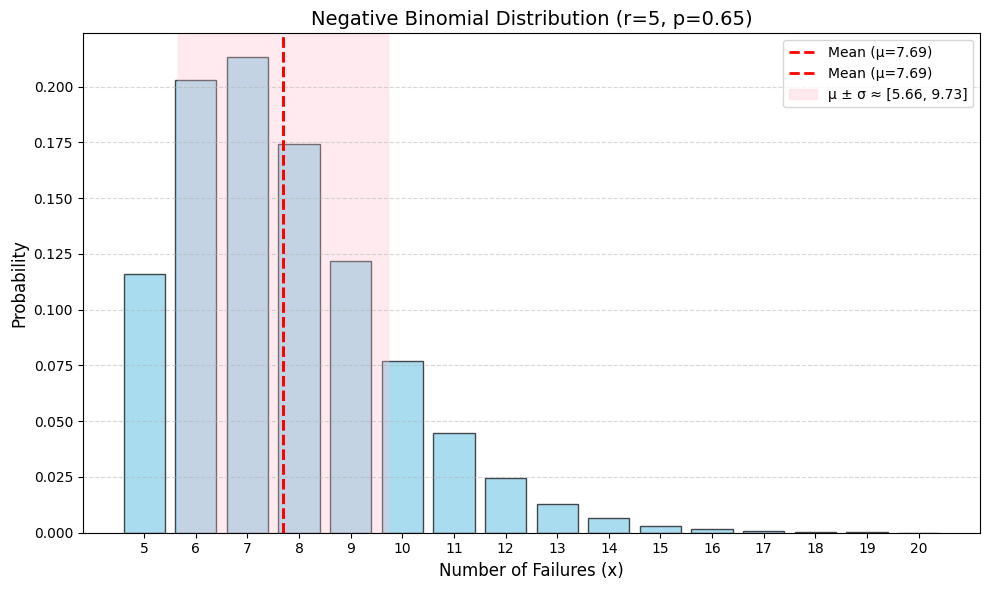

In [ ]:
class NegativeBinomial:
    def __init__(self,teta, r: int, p: float):
        self.r = r
        self.p = p
        self.teta = teta

    def pmf(self, x: int):

        return comb(x + self.r - 1, self.r - 1) * (self.p ** self.r) * ((1 - self.p) ** x)

    def mean(self):

        return self.r * (1 - self.p) / self.p + self.teta

    def variance(self):

        return self.r * (1 - self.p) / (self.p ** 2)

    def graph(self, min_prob: float = 0.0001):
        x_max = 0
        while self.pmf(x_max) >= min_prob:
          x_max += 1

        x_values = np.arange(0+self.teta, x_max + 1+self.teta)
        probabilities = [self.pmf(x-self.teta) for x in x_values]
        mean = self.mean()
        var = self.variance()
        std = np.sqrt(var)


        plt.figure(figsize=(10, 6))
        bars = plt.bar(x_values, probabilities, color='skyblue', alpha=0.7, edgecolor='black')
        plt.title(f'Negative Binomial Distribution (r={self.r}, p={self.p})', fontsize=14)
        plt.xlabel('Number of Failures (x)', fontsize=12)
        plt.ylabel('Probability', fontsize=12)



        plt.axvline(x=mean, color='red', linestyle='--', linewidth=2, label=f'Mean (μ={mean:.2f})')



        plt.axvline(x=mean, color='red', linestyle='--', linewidth=2, label=f'Mean (μ={mean:.2f})')
        lower = mean - std
        upper = mean + std
        plt.axvspan(lower, upper, color='pink', alpha=0.3, label=f'μ ± σ ≈ [{lower:.2f}, {upper:.2f}]')

        plt.grid(axis='y', linestyle='--', alpha=0.5)
        plt.xticks(x_values)
        plt.tight_layout()
        plt.legend()




X3 = NegativeBinomial(teta =5 ,r=5, p=0.65)
X3.graph()


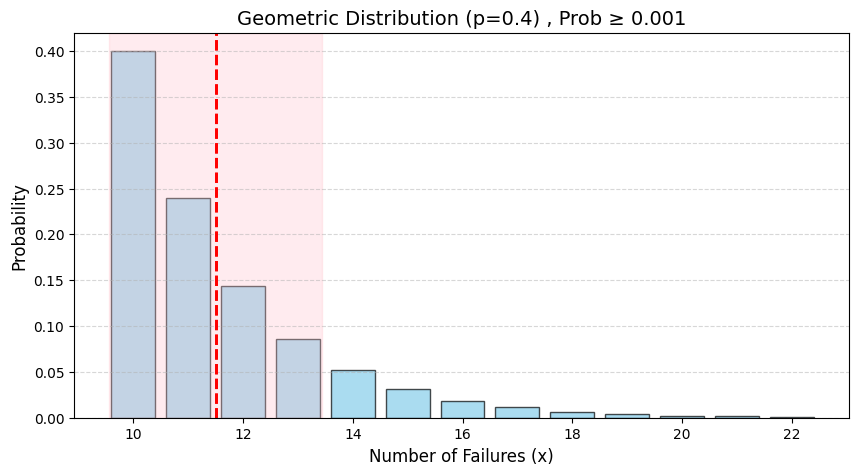

In [ ]:
class Geometric:
    def __init__(self, teta, p: float):
        self.p = p
        self.teta = teta

    def pmf(self, x: int):
        return self.p * (1 - self.p) ** x

    def mean(self):
        return (1 - self.p) / self.p + self.teta

    def variance(self):
        return (1 - self.p) / (self.p ** 2)

    def graph(self, min_prob: float = 0.005):

        x_max = 0
        while self.pmf(x_max) >= min_prob:
            x_max += 1


        x_values = np.arange(0+self.teta, x_max + 1+self.teta)
        probabilities = [self.pmf(x-self.teta) for x in x_values]

        mean = self.mean()
        var = self.variance()
        std = np.sqrt(var)

        plt.figure(figsize=(10, 5))
        plt.bar(x_values, probabilities, color='skyblue', alpha=0.7, edgecolor='black')
        plt.title(f'Geometric Distribution (p={self.p}) , Prob ≥ {min_prob}', fontsize=14)
        plt.xlabel('Number of Failures (x)', fontsize=12)
        plt.ylabel('Probability', fontsize=12)


        plt.axvline(x=mean, color='red', linestyle='--', linewidth=2, label=f'Mean (μ={mean:.2f})')



        plt.axvline(x=mean, color='red', linestyle='--', linewidth=2, label=f'Mean (μ={mean:.2f})')
        lower = mean - std
        upper = mean + std
        plt.axvspan(lower, upper, color='pink', alpha=0.3, label=f'μ ± σ ≈ [{lower:.2f}, {upper:.2f}]')


        plt.grid(axis='y', linestyle='--', alpha=0.5)
        plt.show()

# مثال:
X4 = Geometric(10,0.4)
X4.graph(min_prob=0.001)


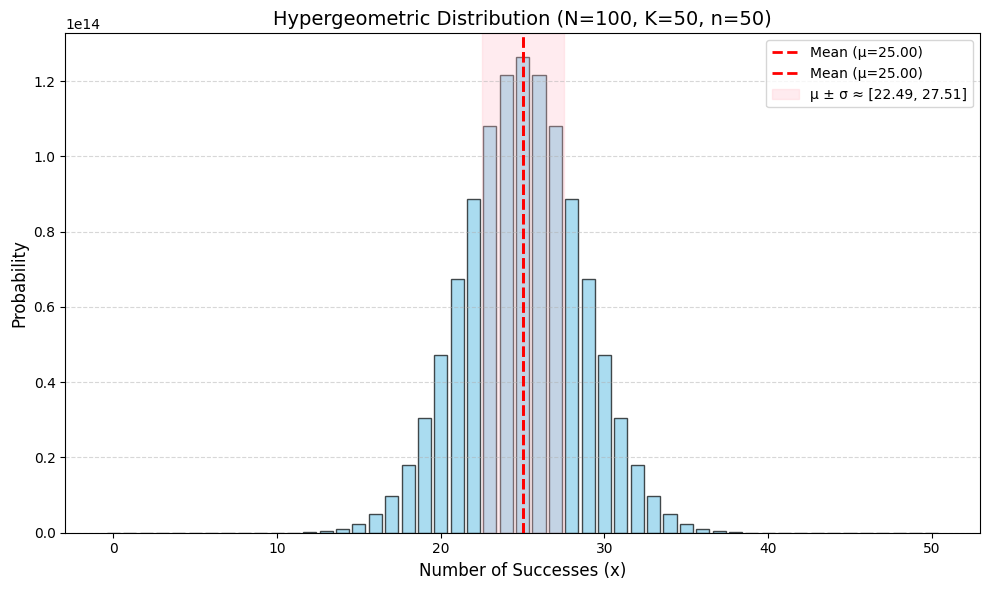

In [ ]:
class Hypergeometric:
    def __init__(self,teta, N: int, K: int, n: int):
        self.N = N  #اعضای کل جامعه
        self.K = K  #کوچکتر از N
        self.n = n  #کوچکتر از N
        self.teta = teta

    def pmf(self, x: int):
        return comb(self.K, x) * comb(self.N - self.K, self.n)

    def mean(self):
        return self.n * (self.K / self.N) + self.teta

    def variance(self):
        return self.n * (self.K / self.N) * (1 - self.K / self.N) * ((self.N - self.n) / (self.N - 1))

    def graph(self):
        x_values = np.arange(max(0, self.n - (self.N - self.K)) + self.teta, min(self.K, self.n) + 1 + self.teta)  # محدوده
        probabilities = [self.pmf(x-self.teta) for x in x_values]
        mean = self.mean()
        var = self.variance()
        std = np.sqrt(var)

        # تنظیمات نمودار
        plt.figure(figsize=(10, 6))
        plt.bar(x_values, probabilities, color='skyblue', alpha=0.7, edgecolor='black')
        plt.title(f'Hypergeometric Distribution (N={self.N}, K={self.K}, n={self.n})', fontsize=14)
        plt.xlabel('Number of Successes (x)', fontsize=12)
        plt.ylabel('Probability', fontsize=12)


        # نمایش میانگین (خط عمودی)
        mean = self.mean()
        plt.axvline(x=mean, color='red', linestyle='--', linewidth=2, label=f'Mean (μ={mean:.2f})')

        plt.axvline(x=mean, color='red', linestyle='--', linewidth=2, label=f'Mean (μ={mean:.2f})')
        lower = mean - std
        upper = mean + std
        plt.axvspan(lower, upper, color='pink', alpha=0.3, label=f'μ ± σ ≈ [{lower:.2f}, {upper:.2f}]')



        plt.grid(axis='y', linestyle='--', alpha=0.5)
        plt.legend()
        plt.tight_layout()

X5 = Hypergeometric(0, 100,50,50)
X5.graph()


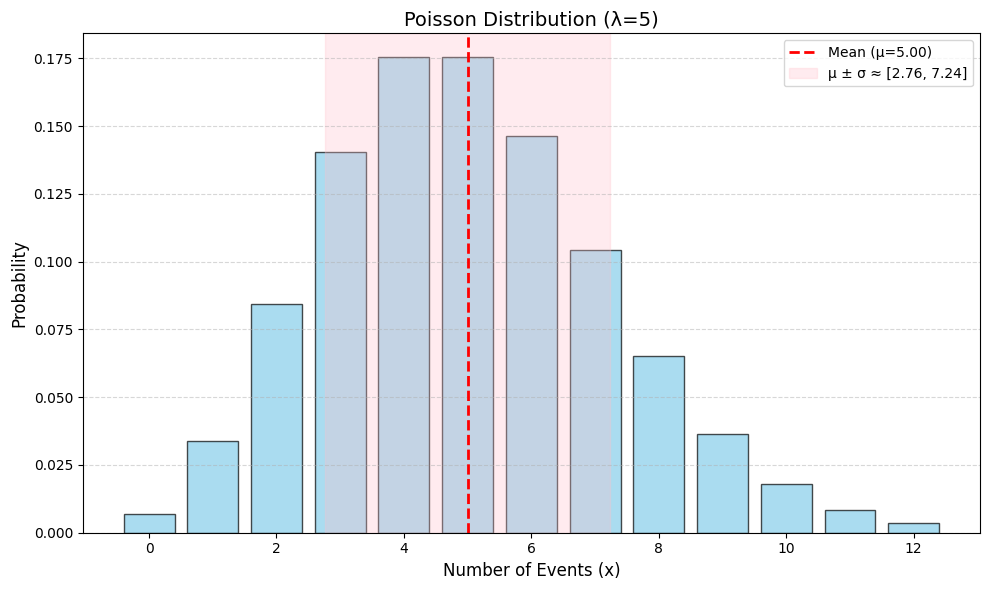

In [ ]:
class Poisson:
    def __init__(self, teta, lambda_: float):
        self.lambda_ = lambda_  # پارامتر توزیع پواسون
        self.teta = teta        # پارامتر جابجایی

    def pmf(self, x: int):
        # تابع جرم احتمال پواسون
        return (exp(-self.lambda_) * (self.lambda_ ** x)) / factorial(x)

    def mean(self):
        return self.lambda_ + self.teta

    def variance(self):
        return self.lambda_  # در پواسون واریانس برابر با λ است

    def graph(self):
        # محدوده مقادیر x را تعیین می‌کنیم (تا 3 انحراف معیار از میانگین)
        x_min = max(0, int(self.mean() - 3 * np.sqrt(self.variance())))
        x_max = int(self.mean() + 3 * np.sqrt(self.variance())) + 1
        x_values = np.arange(x_min, x_max + 1)

        # محاسبه احتمالات
        probabilities = [self.pmf(x - self.teta) for x in x_values]
        mean = self.mean()
        var = self.variance()
        std = np.sqrt(var)

        # تنظیمات نمودار
        plt.figure(figsize=(10, 6))
        plt.bar(x_values, probabilities, color='skyblue', alpha=0.7, edgecolor='black')
        plt.title(f'Poisson Distribution (λ={self.lambda_})', fontsize=14)
        plt.xlabel('Number of Events (x)', fontsize=12)
        plt.ylabel('Probability', fontsize=12)

        # نمایش میانگین (خط عمودی)
        plt.axvline(x=mean, color='red', linestyle='--', linewidth=2, label=f'Mean (μ={mean:.2f})')

        # نمایش محدوده μ ± σ
        lower = mean - std
        upper = mean + std
        plt.axvspan(lower, upper, color='pink', alpha=0.3, label=f'μ ± σ ≈ [{lower:.2f}, {upper:.2f}]')

        plt.grid(axis='y', linestyle='--', alpha=0.5)
        plt.legend()
        plt.tight_layout()

# مثال استفاده از کلاس
X_poisson = Poisson(0, 5)  # توزیع پواسون با λ=5 و teta=0
X_poisson.graph()
plt.show()

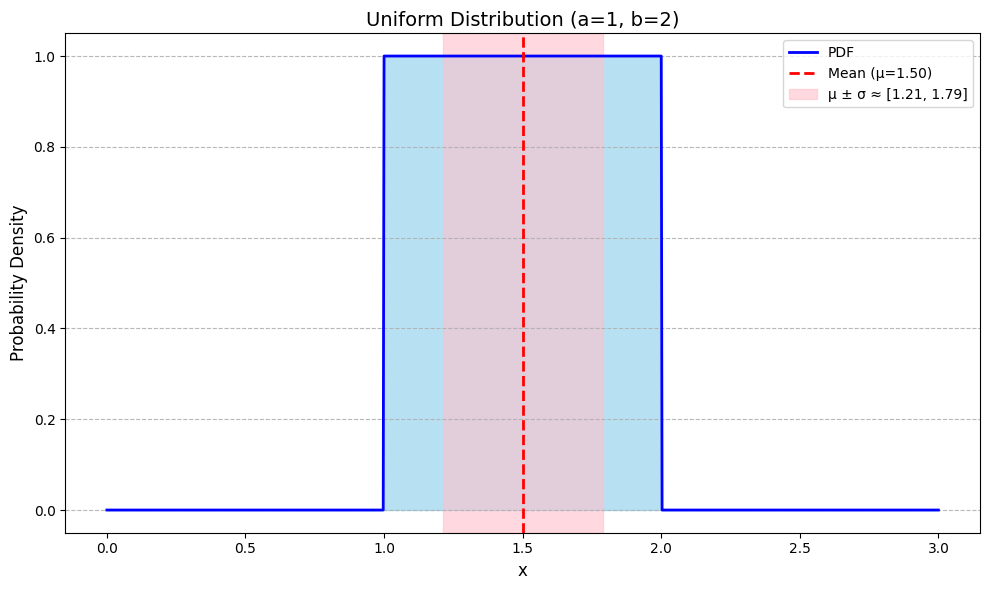

In [ ]:
class Uniform:
    def __init__(self, a: float, b: float):
        self.a = a      # کران پایین
        self.b = b      # کران بالا

    def pdf(self, x: float):
        # تابع چگالی احتمال
        if self.a <= x <= self.b:
            return 1 / (self.b - self.a)
        else:
            return 0.0

    def mean(self):
        return (self.a + self.b) / 2

    def variance(self):
        return (self.b - self.a)**2 / 12

    def graph(self):
        # محدوده نمودار را کمی گسترده‌تر از [a, b] در نظر می‌گیریم
        x_min = self.a - 1
        x_max = self.b + 1
        x_values = np.linspace(x_min, x_max, 1000)

        # محاسبه مقادیر PDF
        y_values = [self.pdf(x) for x in x_values]
        mean = self.mean()
        var = self.variance()
        std = np.sqrt(var)

        # تنظیمات نمودار
        plt.figure(figsize=(10, 6))
        plt.plot(x_values, y_values, 'b-', linewidth=2, label='PDF')
        plt.fill_between(x_values, y_values, color='skyblue', alpha=0.6)

        plt.title(f'Uniform Distribution (a={self.a}, b={self.b})', fontsize=14)
        plt.xlabel('x', fontsize=12)
        plt.ylabel('Probability Density', fontsize=12)

        # نمایش میانگین (خط عمودی)
        plt.axvline(x=mean, color='red', linestyle='--', linewidth=2, label=f'Mean (μ={mean:.2f})')

        # نمایش محدوده μ ± σ (فقط اگر معنی دار باشد)
        if std > 0:
            lower = mean - std
            upper = mean + std
            plt.axvspan(lower, upper, color='pink', alpha=0.6, label=f'μ ± σ ≈ [{lower:.2f}, {upper:.2f}]')

        plt.grid(axis='y', linestyle='--', alpha=0.9)
        plt.legend()
        plt.tight_layout()


# مثال استفاده از کلاس
X_uniform = Uniform(a=1, b=2)  # توزیع یکنواخت در بازه [2, 5] با جابجایی 0
X_uniform.graph()
plt.show()

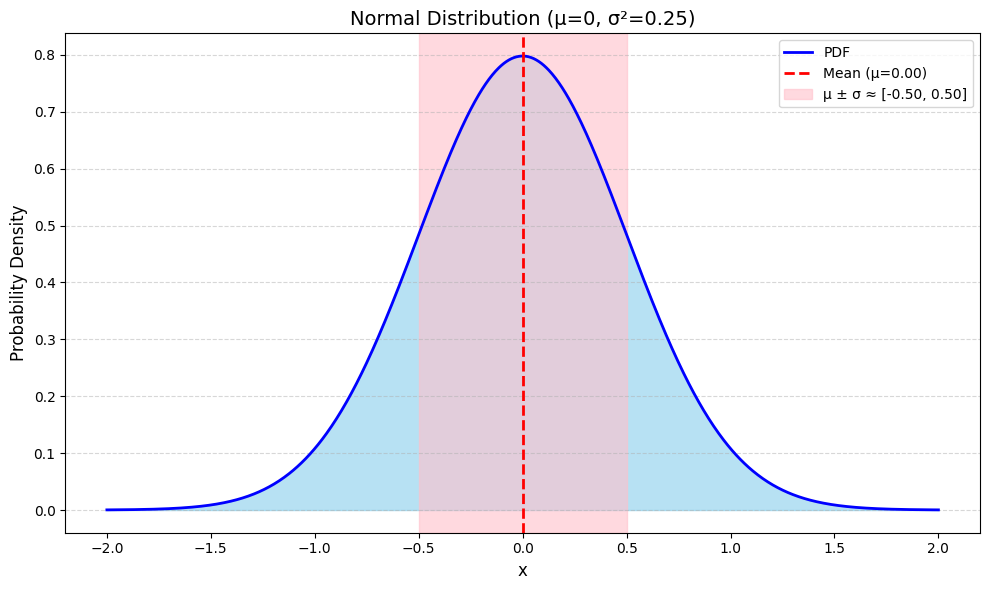

In [ ]:
class Normal:
    def __init__(self, miu=0, variance=1):
        self.miu = miu          # میانگین توزیع
        self.variance = variance # واریانس توزیع

    def pdf(self, x: float):
        # تابع چگالی احتمال نرمال
        sigma = sqrt(self.variance)
        x_shifted = x
        return (1 / (sigma * sqrt(2 * pi))) * exp(-0.5 * ((x_shifted - self.miu) / sigma)**2)

    def mean(self):
        return self.miu

    def variance(self):
        return self.variance

    def graph(self):
        # محدوده نمودار را 4 انحراف معیار از میانگین در نظر می‌گیریم
        sigma = sqrt(self.variance)
        x_min = self.mean() - 4 * sigma
        x_max = self.mean() + 4 * sigma
        x_values = np.linspace(x_min, x_max, 1000)

        # محاسبه مقادیر PDF
        y_values = [self.pdf(x) for x in x_values]
        mean = self.mean()
        var = self.variance
        std = sigma

        # تنظیمات نمودار
        plt.figure(figsize=(10, 6))
        plt.plot(x_values, y_values, 'b-', linewidth=2, label='PDF')
        plt.fill_between(x_values, y_values, color='skyblue', alpha=0.6)

        plt.title(f'Normal Distribution (μ={self.miu}, σ²={self.variance})', fontsize=14)
        plt.xlabel('x', fontsize=12)
        plt.ylabel('Probability Density', fontsize=12)

        # نمایش میانگین (خط عمودی)
        plt.axvline(x=mean, color='red', linestyle='--', linewidth=2, label=f'Mean (μ={mean:.2f})')

        # نمایش محدوده μ ± σ
        lower = mean - std
        upper = mean + std
        plt.axvspan(lower, upper, color='pink', alpha=0.6, label=f'μ ± σ ≈ [{lower:.2f}, {upper:.2f}]')

        plt.grid(axis='y', linestyle='--', alpha=0.5)
        plt.legend()
        plt.tight_layout()

# مثال استفاده از کلاس
X_normal = Normal(miu=0, variance=0.25)  # توزیع نرمال استاندارد
X_normal.graph()
plt.show()

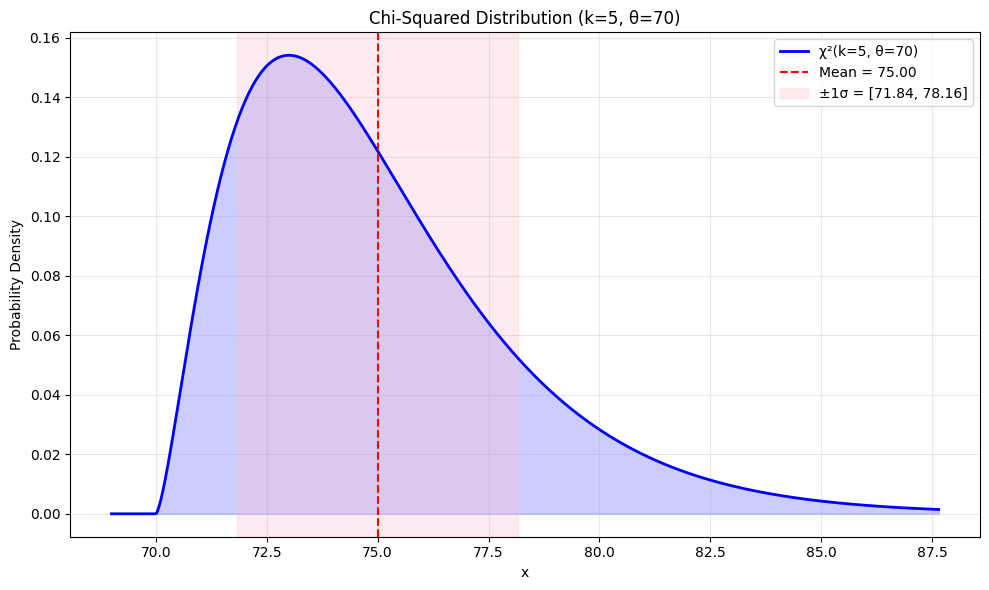

In [ ]:
class ChiSquared:
    def __init__(self, k: int, teta=0):

        self.teta = teta
        self.k = k
    def pdf(self, x: float):
        """تابع چگالی احتمال در نقطه x"""
        x_shifted = x - self.teta
        if x_shifted > 0:
            numerator = (x_shifted ** (self.k/2 - 1)) * exp(-x_shifted/2)
            denominator = (2 ** (self.k/2)) * gamma(self.k/2)
            return numerator / denominator
        else:
            return 0.0

    def mean(self):
        """میانگین توزیع"""
        return self.k + self.teta

    def variance(self):
        """واریانس توزیع"""
        return 2 * self.k

    def graph(self):
        """رسم نمودار توزیع کای-دو"""
        x_min = self.teta - 1
        x_max = self.teta + (self.k + 4 * np.sqrt(2 * self.k))
        x_values = np.linspace(x_min, x_max, 1000)

        # محاسبه PDF
        y_values = [self.pdf(x) for x in x_values]
        mean = self.mean()
        std = np.sqrt(self.variance())

        # رسم نمودار
        plt.figure(figsize=(10, 6))
        plt.plot(x_values, y_values, 'b-', lw=2,
                label=f'χ²(k={self.k}, θ={self.teta})')
        plt.fill_between(x_values, y_values, color='blue', alpha=0.2)

        plt.title(f'Chi-Squared Distribution (k={self.k}, θ={self.teta})')
        plt.xlabel('x')
        plt.ylabel('Probability Density')

        # نمایش میانگین و انحراف معیار
        plt.axvline(mean, color='red', linestyle='--', label=f'Mean = {mean:.2f}')

        # نمایش محدوده μ ± σ اگر در محدوده معتبر باشد
        lower = mean - std
        upper = mean + std
        if lower >= self.teta:
            plt.axvspan(lower, upper, color='pink', alpha=0.3,
                       label=f'±1σ = [{lower:.2f}, {upper:.2f}]')

        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()

chi2 = ChiSquared(k=5, teta = 70)
chi2.graph()

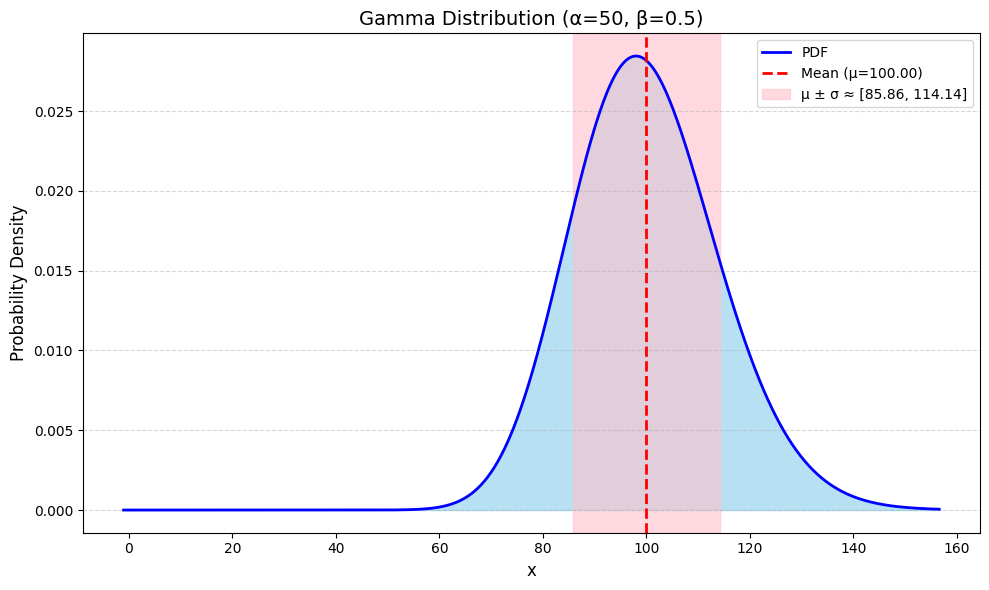

In [ ]:
class Gamma:
    def __init__(self, teta, a, b):
        self.a = a        # پارامتر شکل (shape)
        self.b = b        # پارامتر نرخ (rate)
        self.teta = teta  # پارامتر جابجایی

    def pdf(self, x: float):
        # تابع چگالی احتمال گاما
        if x > self.teta:
            x_shifted = x - self.teta
            return (self.b**self.a * x_shifted**(self.a - 1) * exp(-self.b * x_shifted)) / gamma(self.a)
        else:
            return 0.0

    def mean(self):
        return self.a / self.b + self.teta

    def variance(self):
        return self.a / self.b**2

    def graph(self):
        # محدوده نمودار را از teta تا میانگین + 4 انحراف معیار در نظر می‌گیریم
        std = np.sqrt(self.variance())
        x_min = self.teta - 1
        x_max = self.mean() + 4 * std
        x_values = np.linspace(x_min, x_max, 1000)

        # محاسبه مقادیر PDF
        y_values = [self.pdf(x) for x in x_values]
        mean = self.mean()
        var = self.variance()
        std = np.sqrt(var)

        # تنظیمات نمودار
        plt.figure(figsize=(10, 6))
        plt.plot(x_values, y_values, 'b-', linewidth=2, label='PDF')
        plt.fill_between(x_values, y_values, color='skyblue', alpha=0.6)

        plt.title(f'Gamma Distribution (α={self.a}, β={self.b})', fontsize=14)
        plt.xlabel('x', fontsize=12)
        plt.ylabel('Probability Density', fontsize=12)

        # نمایش میانگین (خط عمودی)
        plt.axvline(x=mean, color='red', linestyle='--', linewidth=2, label=f'Mean (μ={mean:.2f})')

        # نمایش محدوده μ ± σ (فقط اگر در محدوده معتبر باشد)
        lower = mean - std
        upper = mean + std
        if lower >= self.teta:  # فقط اگر محدوده پایین‌تر از teta نباشد
            plt.axvspan(lower, upper, color='pink', alpha=0.6, label=f'μ ± σ ≈ [{lower:.2f}, {upper:.2f}]')

        plt.grid(axis='y', linestyle='--', alpha=0.5)
        plt.legend()
        plt.tight_layout()

# مثال استفاده از کلاس
X_gamma = Gamma(teta=0, a=50, b=0.5)  # توزیع گاما با α=2, β=0.5 و جابجایی 0
X_gamma.graph()
plt.show()

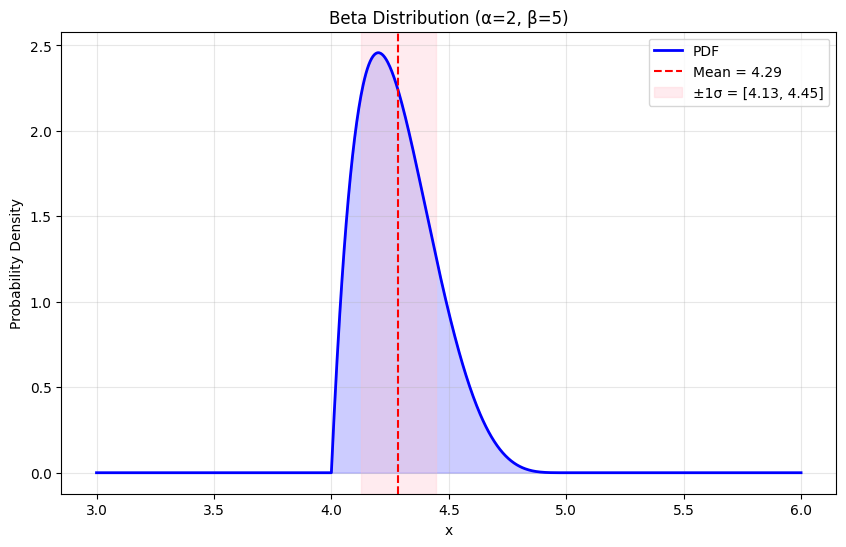

In [ ]:
class Beta:
    def __init__(self, teta=0, a=1, b=1):

        self.a = a
        self.b = b
        self.teta = teta

    def pdf(self, x):
        x_shifted = x - self.teta
        if 0 <= x_shifted <= 1:
            return (x_shifted**(self.a-1) * (1-x_shifted)**(self.b-1)) / beta(self.a, self.b)
        else:
            return 0.0

    def mean(self):
        """میانگین توزیع"""
        return self.a / (self.a + self.b) + self.teta

    def variance(self):
        """واریانس توزیع"""
        return (self.a * self.b) / ((self.a + self.b)**2 * (self.a + self.b + 1))

    def graph(self, num_points=1000):
        """
        رسم نمودار توزیع بتا
        """
        x = np.linspace(self.teta-1, self.teta + 2, num_points)
        y = [self.pdf(xi) for xi in x]

        plt.figure(figsize=(10, 6))
        plt.plot(x, y, 'b-', lw=2, label='PDF')
        plt.fill_between(x, y, color='blue', alpha=0.2)

        plt.title(f'Beta Distribution (α={self.a}, β={self.b})')
        plt.xlabel('x')
        plt.ylabel('Probability Density')

        # نمایش میانگین و انحراف معیار
        mean = self.mean()
        std = np.sqrt(self.variance())
        plt.axvline(mean, color='red', linestyle='--', label=f'Mean = {mean:.2f}')
        plt.axvspan(mean-std, mean+std, color='pink', alpha=0.3,
                   label=f'±1σ = [{mean-std:.2f}, {mean+std:.2f}]')

        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.show()

# مثال استفاده:
# توزیع بتا با پارامترهای مختلف
beta1 = Beta(teta = 4, a=2, b=5)
beta1.graph()


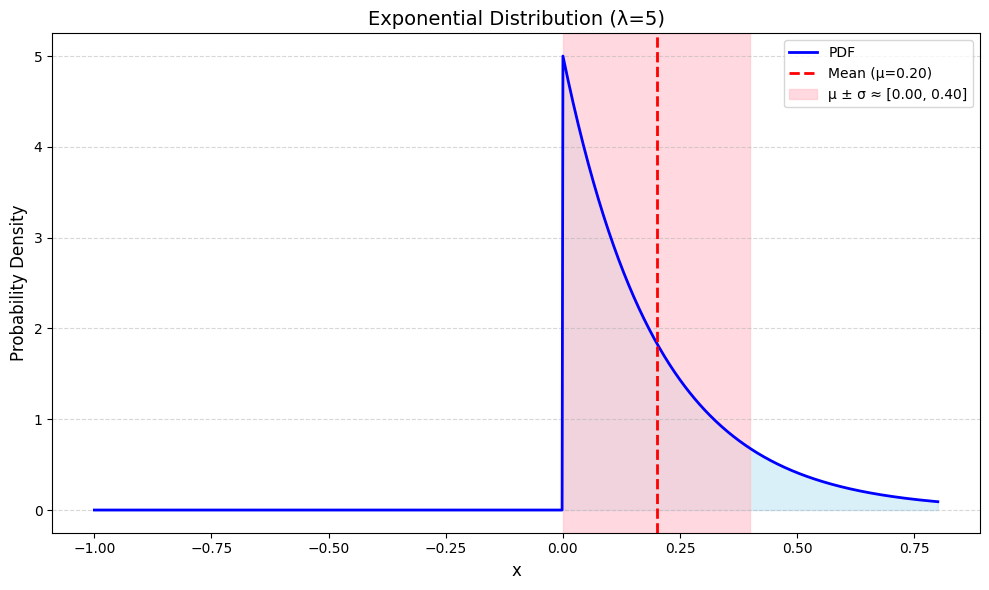

In [ ]:
class Exponential:
    def __init__(self, landa, teta = 0):
        self.landa = landa  # پارامتر نرخ توزیع نمایی
        self.teta = teta    # پارامتر جابجایی

    def pdf(self, x: float):
        # تابع چگالی احتمال نمایی
        if x >= self.teta:
            return self.landa * exp(-self.landa * (x - self.teta))
        else:
            return 0.0

    def mean(self):
        return 1/self.landa + self.teta

    def variance(self):
        return 1/self.landa**2  # واریانس تحت تأثیر جابجایی قرار نمی‌گیرد

    def graph(self):
        x_min = self.teta-1
        x_max = self.teta + 4/self.landa
        x_values = np.linspace(x_min, x_max, 1000)

        # محاسبه مقادیر PDF
        y_values = [self.pdf(x) for x in x_values]
        mean = self.mean()
        var = self.variance()
        std = np.sqrt(var)

        # تنظیمات نمودار
        plt.figure(figsize=(10, 6))
        plt.plot(x_values, y_values, 'b-', linewidth=2, label='PDF')
        plt.fill_between(x_values, y_values, color='skyblue', alpha=0.3)

        plt.title(f'Exponential Distribution (λ={self.landa})', fontsize=14)
        plt.xlabel('x', fontsize=12)
        plt.ylabel('Probability Density', fontsize=12)

        # نمایش میانگین (خط عمودی)
        plt.axvline(x=mean, color='red', linestyle='--', linewidth=2, label=f'Mean (μ={mean:.2f})')

        # نمایش محدوده μ ± σ (فقط اگر در محدوده معتبر باشد)
        lower = mean - std
        upper = mean + std
        if lower >= self.teta:  # فقط اگر محدوده پایین تر از teta نباشد
            plt.axvspan(lower, upper, color='pink', alpha=0.6, label=f'μ ± σ ≈ [{lower:.2f}, {upper:.2f}]')

        plt.grid(axis='y', linestyle='--', alpha=0.5)
        plt.legend()
        plt.tight_layout()

# مثال استفاده از کلاس
X_exp = Exponential(landa=5)  # توزیع نمایی با λ=0.5 و جابجایی 0
X_exp.graph()
plt.show()

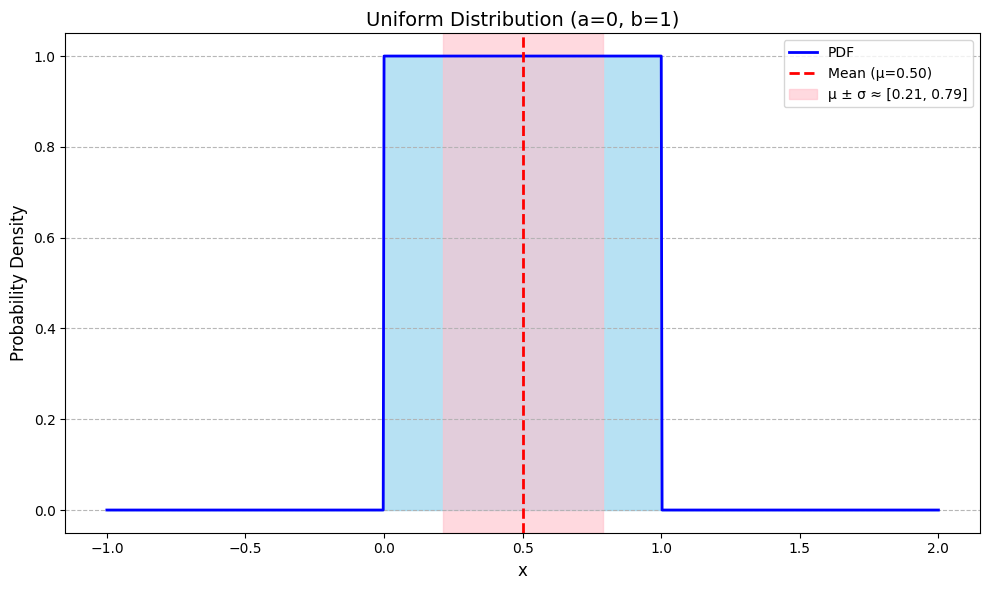

In [ ]:
x1 = Uniform(0,1)
x1.graph()

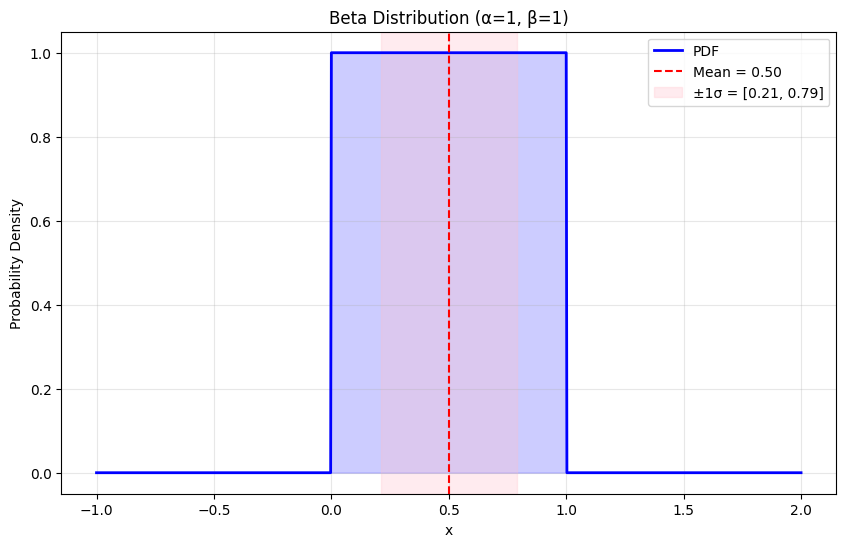

In [ ]:
x2 = Beta(0,1,1)
x2.graph()

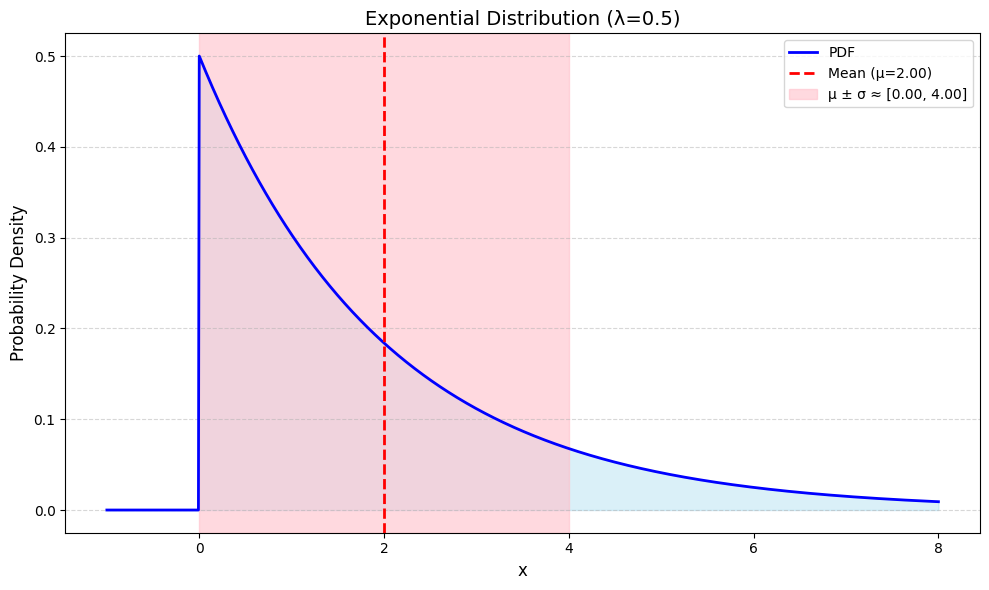

In [ ]:
x3 = Exponential(1/2)
x3.graph()

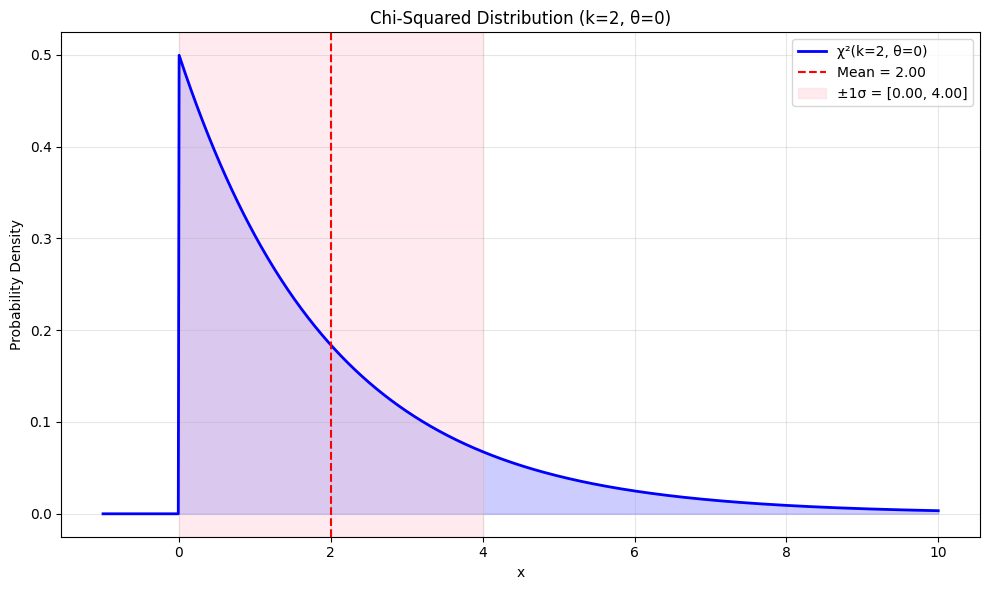

In [ ]:
x4 = ChiSquared(2)
x4.graph()

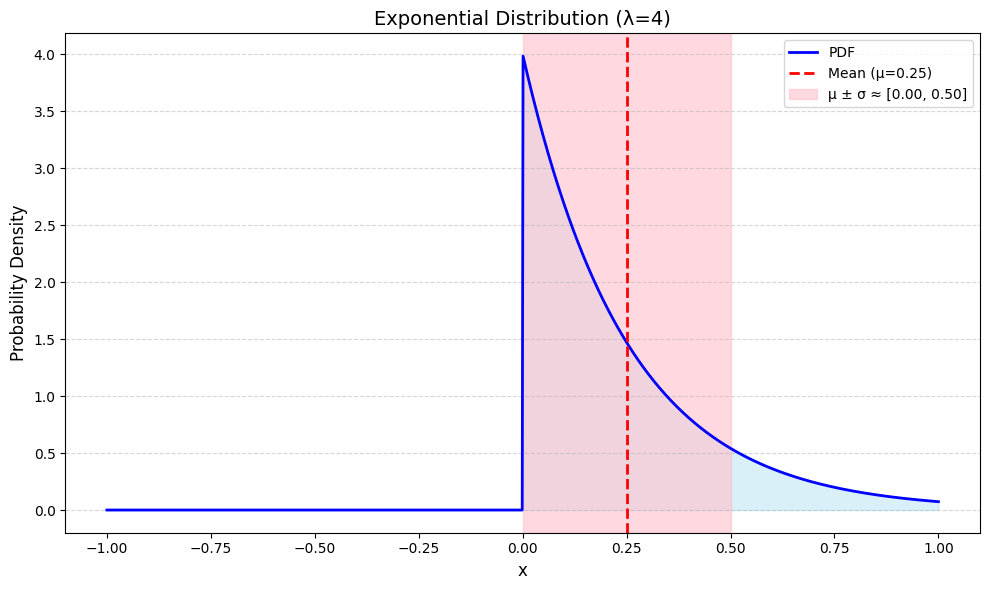

In [ ]:
x5 = Exponential(landa = 4)
x5.graph()

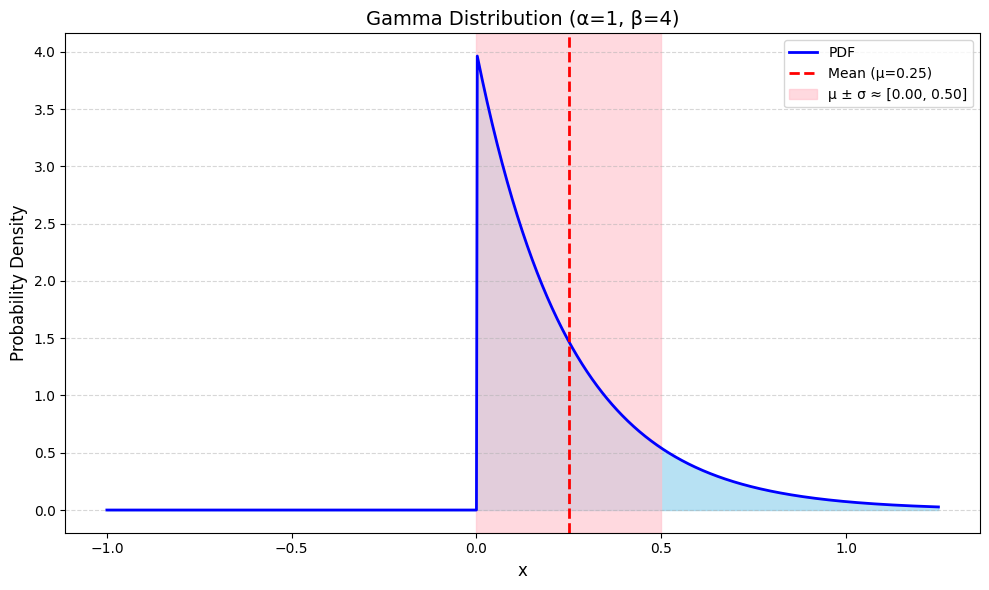

In [ ]:
x6 = Gamma(teta = 0, a = 1, b = 4)
x6.graph()

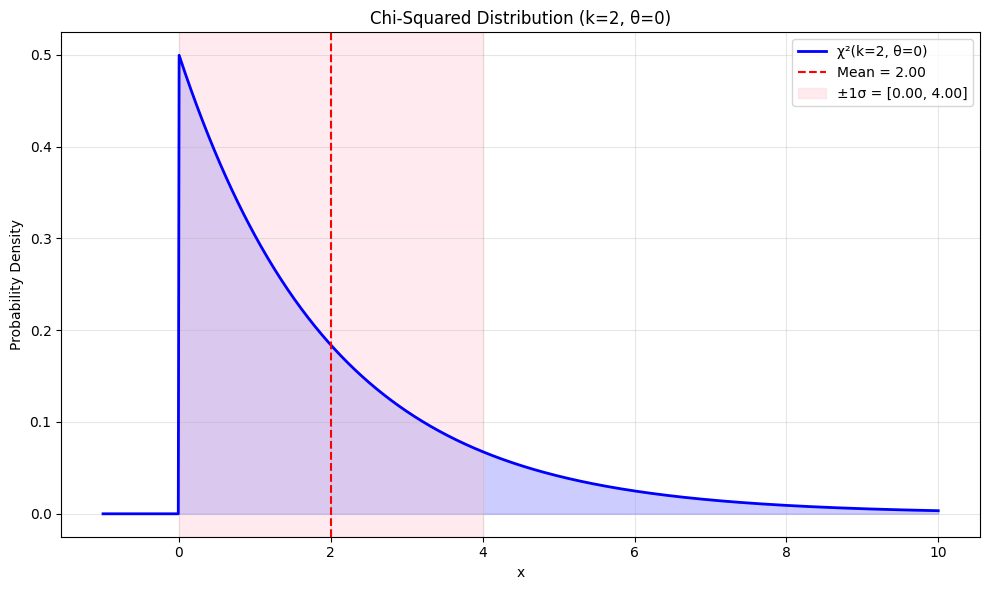

In [ ]:
x7 = ChiSquared(2)
x7.graph()

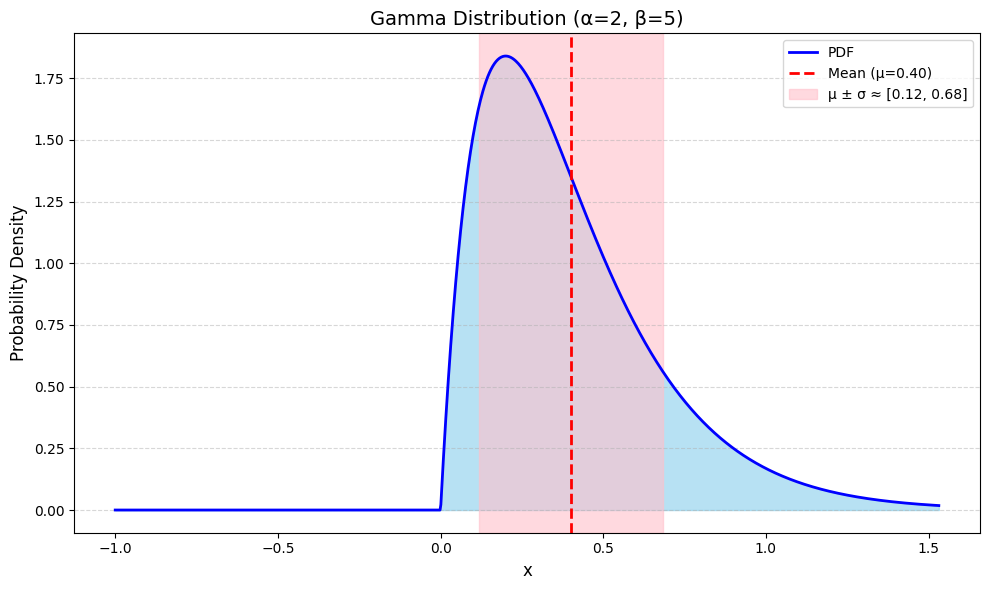

In [ ]:
x8 = Gamma(teta = 0, a = 1,b =2)
x8.graph()